In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

df = pd.read_csv("input.csv", delimiter=",")
df = df.drop(columns=["name","description","temperament"]) # Retira-se nome, descrição e temperamento, pois são irrelevantes para o processamento


#### Ao ler os dados, é notavel que os valores para: grooming_frequency, shedding, energy_level, trainability e demeanor são equivalentes a sua categoria, logo, pode-se ignorar todas as colunas que terminem com "category" visto que são dados redundantes

In [164]:
df = df.drop(columns=["grooming_frequency_category","shedding_category","energy_level_category","trainability_category","demeanor_category"])
df

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,148,22.86,29.21,3.175147,4.535924,12.0,15.0,Toy Group,0.6,0.6,0.6,0.8,1.0
1,113,63.50,68.58,22.679619,27.215542,12.0,15.0,Hound Group,0.8,0.2,0.8,0.2,0.2
2,60,58.42,58.42,22.679619,31.751466,11.0,14.0,Terrier Group,0.6,0.4,0.6,1.0,0.8
3,47,60.96,71.12,31.751466,58.967008,10.0,13.0,Working Group,0.8,0.6,0.8,1.0,0.6
4,58,58.42,63.50,34.019428,38.555351,10.0,14.0,Working Group,0.6,0.6,0.8,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,167,54.61,63.50,20.411657,29.483504,12.0,14.0,Sporting Group,0.2,0.6,0.8,0.6,0.6
273,NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6
274,140,25.40,58.42,4.535924,24.947580,13.0,18.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6
275,NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4


In [165]:

print('Valores faltantes:\n', df.isnull().sum())

Valores faltantes:
 popularity                  79
min_height                   0
max_height                   0
min_weight                   2
max_weight                   2
min_expectancy               3
max_expectancy               3
group                        0
grooming_frequency_value     7
shedding_value              20
energy_level_value           6
trainability_value          24
demeanor_value              25
dtype: int64


Para os atributos com mais valores em falta, irei substituir o vazio pela mediana, enquanto que os outros apenas serão retirados da amostra

In [166]:
# Substitui os valores faltantes dos atributos abaixo pela mediana
df["popularity"] = pd.to_numeric(df["popularity"], errors="coerce")
median = df["popularity"].median(skipna=True)
df["popularity"] = df["popularity"].fillna(median)

df["trainability_value"] = pd.to_numeric(df["trainability_value"], errors="coerce")
median = df["trainability_value"].median(skipna=True)
df["trainability_value"] = df["trainability_value"].fillna(median)

df["demeanor_value"] = pd.to_numeric(df["demeanor_value"], errors="coerce")
median = df["demeanor_value"].median(skipna=True)
df["demeanor_value"] = df["demeanor_value"].fillna(median)

df["shedding_value"] = pd.to_numeric(df["shedding_value"], errors="coerce")
median = df["shedding_value"].median(skipna=True)
df["shedding_value"] = df["shedding_value"].fillna(median)


df = df.dropna(how ='any') #elimina todas as linhas com dados ausentes

In [167]:
corr = df.drop(columns="group").corr()
corr

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
popularity,1.000000,0.037221,0.053758,-0.022117,-0.050813,0.118716,0.061385,-0.155628,-0.099007,0.052377,-0.213617,-0.217652
min_height,0.037221,1.000000,0.933732,0.811792,0.786685,-0.464426,-0.457134,-0.181040,0.283145,0.196930,-0.049078,-0.224669
max_height,0.053758,0.933732,1.000000,0.786428,0.799783,-0.444958,-0.463531,-0.241034,0.318375,0.222669,-0.053160,-0.283762
min_weight,-0.022117,0.811792,0.786428,1.000000,0.945642,-0.553752,-0.555008,-0.133989,0.281830,-0.040137,-0.125283,-0.254599
max_weight,-0.050813,0.786685,0.799783,0.945642,1.000000,-0.524185,-0.526284,-0.113161,0.275331,-0.052876,-0.071532,-0.249876
min_expectancy,0.118716,-0.464426,-0.444958,-0.553752,-0.524185,1.000000,0.775668,0.028110,-0.237884,0.002235,0.093334,0.175602
max_expectancy,0.061385,-0.457134,-0.463531,-0.555008,-0.526284,0.775668,1.000000,0.126787,-0.344983,0.008361,0.099993,0.167268
grooming_frequency_value,-0.155628,-0.181040,-0.241034,-0.133989,-0.113161,0.028110,0.126787,1.000000,-0.064662,-0.157801,0.106910,0.105151
shedding_value,-0.099007,0.283145,0.318375,0.281830,0.275331,-0.237884,-0.344983,-0.064662,1.000000,0.175940,0.034576,-0.167182
energy_level_value,0.052377,0.196930,0.222669,-0.040137,-0.052876,0.002235,0.008361,-0.157801,0.175940,1.000000,0.120183,-0.006397


Há uma forte correlação entre altura e peso, então irei junta-los em um atributo só, primeiro tirarei a media da altura e do peso e os somarei.
Expectancy será substituido pela média pelo mesmo motivo

In [168]:

# Size define a junção das médias das alturas com a média dos pesos
df_copy = df.copy()
df_copy["size"] = (df_copy["min_height"] + df_copy["max_height"])/2 + (df_copy["min_weight"] + df_copy["max_weight"])/2

df_copy["avg_expectancy"] = (df["min_expectancy"] + df["max_expectancy"])/2

df = df.drop(columns=["min_height","min_weight","min_expectancy","max_height","max_weight","max_expectancy"])
df["size"] = df_copy["size"]
df["avg_expectancy"] = df_copy["avg_expectancy"]
df

,popularity,group,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value,size,avg_expectancy
0,148.0,Toy Group,0.6,0.6,0.6,0.8,1.0,29.890535,13.5
1,113.0,Hound Group,0.8,0.2,0.8,0.2,0.2,90.987580,13.5
2,60.0,Terrier Group,0.6,0.4,0.6,1.0,0.8,85.635542,12.5
3,47.0,Working Group,0.8,0.6,0.8,1.0,0.6,111.399237,11.5
4,58.0,Working Group,0.6,0.6,0.8,0.4,0.8,97.247390,12.0
...,...,...,...,...,...,...,...,...,...
272,167.0,Sporting Group,0.2,0.6,0.8,0.6,0.6,84.002580,13.0
273,96.0,Foundation Stock Service,0.2,0.6,0.8,0.4,0.6,75.838064,13.5
274,140.0,Non-Sporting Group,0.2,0.2,0.8,0.6,0.6,56.651752,15.5
275,96.0,Foundation Stock Service,0.4,0.6,0.8,0.2,0.4,77.425638,11.0


Plotagem do gráfico para cada um dos atributos, o intuito é ver valores possivelmente fora da lógica dos dados, e encontrar valores que aparecem menos que os outros.

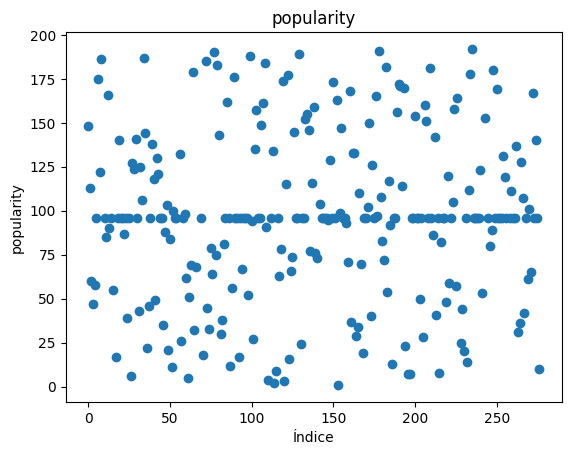

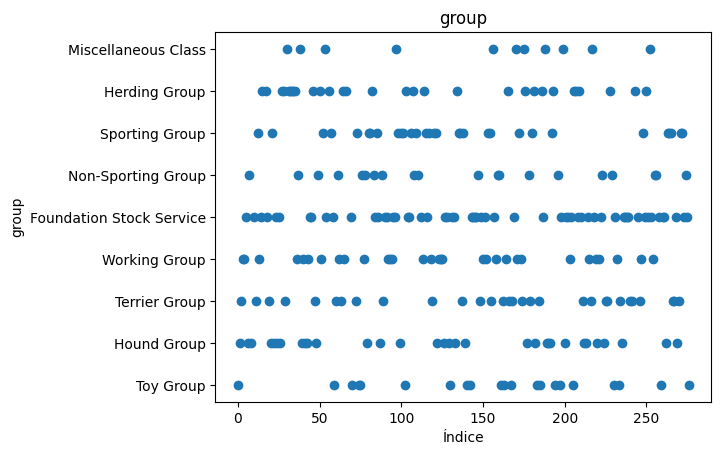

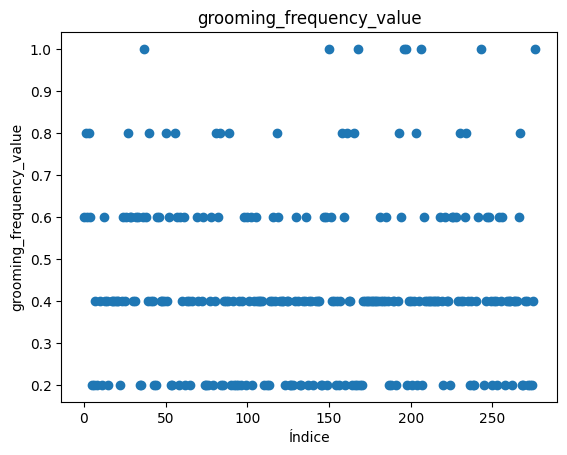

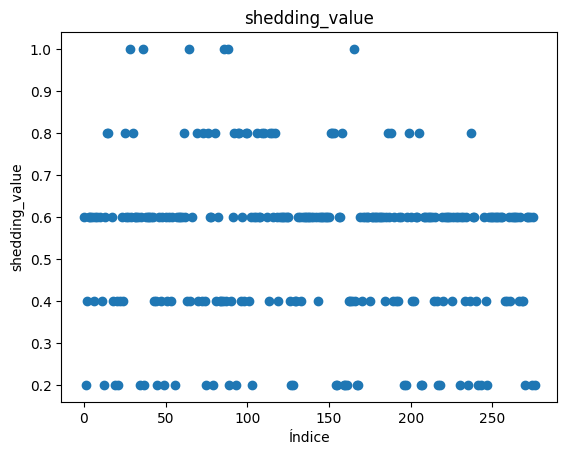

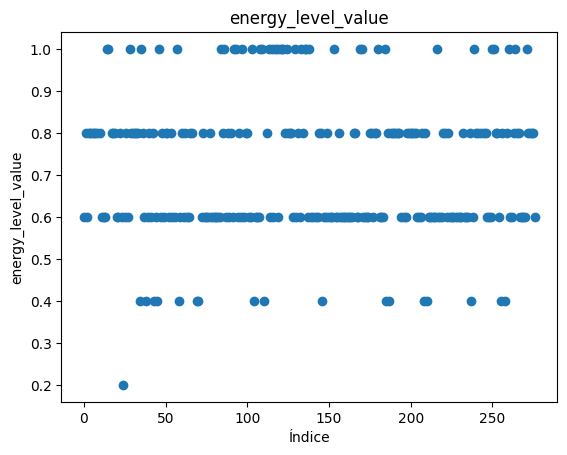

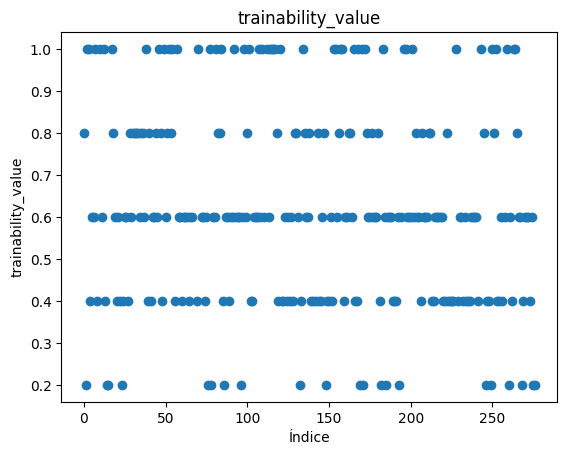

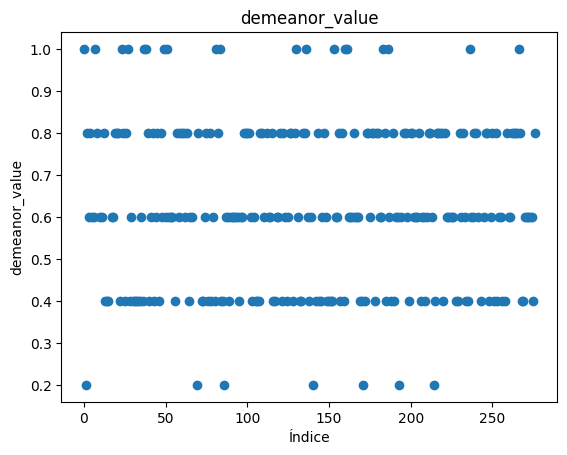

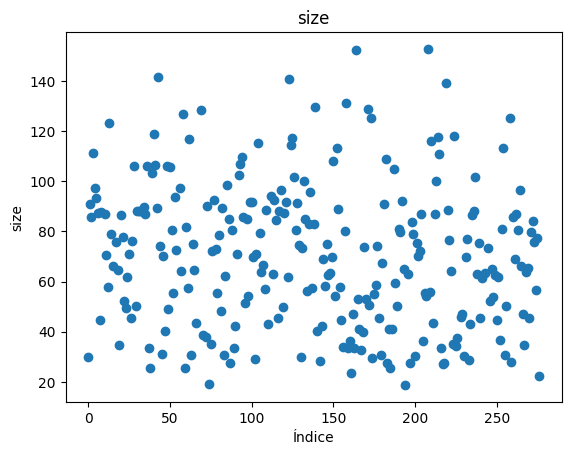

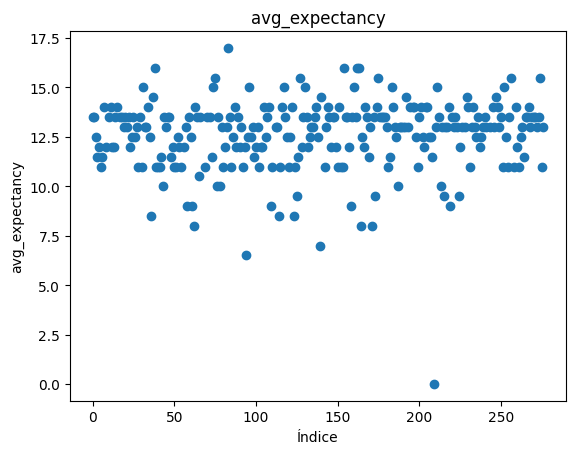

In [169]:
for column in df.columns:
    plt.figure()
    plt.plot(df.index, df[column], marker='o', linestyle='None')
    plt.title(column)
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.show()

 Pela plotagem dos gráficos, é notavel que há valores que aparecem bem menos do que os outros, irei aplicar o boosting.
Além disso, a variância para avg_expectancy é extremamente baixa, tornando-a inutil para o modelo, irei removê-la.
 Há um valor com 0.2 de energy_value, porém se trata de um outlier e não de um erro, visto que há uma categoria denominada 'couch potato' apenas para ele.

In [170]:
df = df.drop(columns="avg_expectancy")

# Duplicar os dados minoritários

group_misc_data = df[df['group'] == "Miscellaneous Class"]
demeanor_02_data = df[df["demeanor_value"] == 0.2]
demeanor_1_data = df[df["demeanor_value"] == 1]
grooming_1_data = df[df["grooming_frequency_value"] == 1]
shedding_1_data = df[df["shedding_value"] == 1.0 ]
shedding_08_data = df[df["shedding_value"] == 0.8 ]
energy_04_data = df[df["energy_level_value"] == 0.4]
energy_1_data = df[df["energy_level_value"] == 1]
group_hs_data = df[df['size'] > 120]
df = pd.concat([df, group_misc_data], ignore_index=True)
df = pd.concat([df, grooming_1_data], ignore_index=True)
df = pd.concat([df, demeanor_02_data], ignore_index=True)
df = pd.concat([df, demeanor_1_data], ignore_index=True)
df = pd.concat([df, shedding_1_data], ignore_index=True)
df = pd.concat([df, shedding_08_data], ignore_index=True)
df = pd.concat([df, energy_04_data], ignore_index=True)
df = pd.concat([df, energy_1_data], ignore_index=True)


In [171]:
from sklearn.preprocessing import MinMaxScaler

# Excluir a coluna 'group' antes de normalizar
df_without_group = df.drop('group', axis=1)
group = df["group"]
# Criar um objeto MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalizar os dados usando MinMaxScaler
df_normalized = min_max_scaler.fit_transform(df_without_group)

# Criar um novo DataFrame com os dados normalizados
df_normalized = pd.DataFrame(df_normalized, columns=df_without_group.columns)


In [172]:
df_normalized.to_csv("Processed_data.csv",index=False)
df["group"].to_csv("grupos.csv",index=False)